In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tools.sm_exceptions import InterpolationWarning

## I - Data preprocessing et exploration initiale

In [2]:
CAC = pd.read_excel("C:\\Users\\boyan\\Documents\\MiE2\\Advanced Econometrics II - Semi-parametric and simulations\\Data\\CAC 40 Daily Max.xlsx")
DIV = pd.read_excel("C:\\Users\\boyan\\Documents\\MiE2\\Advanced Econometrics II - Semi-parametric and simulations\\Data\\CAC 40 Synthetic Dividend Daily Max.xlsx")
RATE = pd.read_excel("C:\\Users\\boyan\\Documents\\MiE2\\Advanced Econometrics II - Semi-parametric and simulations\\Data\\French OAT 10Y Daily Max.xlsx")

In [3]:
CAC['Date'] = pd.to_datetime(CAC['Date'])
DIV['Date'] = pd.to_datetime(DIV['Date'])
RATE['Date'] = pd.to_datetime(RATE['Date'])

#### A/ Tests de Stationnarité

In [ ]:
# LOG-DIFFERENTIATION AND MERGE

# log diff, en forçant à 0 quand ça ne marche pas 
def log_secure(x):
    return np.log(x) if x > 0 else 0.0

dfs = [
    (CAC,                     "CAC"),
    (DIV, "DIV"),
    (RATE,                          "RATE"),
]

new_dfs = {}
for df, name in dfs:
    col = df.columns[1]
    # float
    df[col] = pd.to_numeric(
        df[col].astype(str).str.replace(',', '.', regex=False),
        errors='coerce'
    )
    df.dropna(subset=[col], inplace=True)
    # og-secure + diff
    logs = df[col].map(log_secure)
    logdiff = logs.diff().fillna(0)
    # 1.3 Stockage dans un nouveau DataFrame
    new_dfs[name] = pd.DataFrame({f"{name}_logdiff": logdiff})

# 2. Boucle de tests ADF & KPSS
records = []
for name, new_df in new_dfs.items():
    serie = new_df[f"{name}_logdiff"].dropna()
    
    # ADF : H₀ = racine unitaire
    adf_stat, adf_p, *_ = adfuller(serie, regression='c', autolag='AIC')
    adf_stationnaire = (adf_p < 0.05)
    
    # KPSS : H₀ = stationnarité faible
    kpss_stat, kpss_p, *_ = kpss(serie, regression='c', nlags='auto')
    kpss_stationnaire = (kpss_p > 0.0999999)
    
    records.append({
        "series": name,
        "ADF_stat": adf_stat,
        "ADF_pval": adf_p,
        "ADF_stationnaire": adf_stationnaire,
        "KPSS_stat": kpss_stat,
        "KPSS_pval": kpss_p,
        "KPSS_stationnaire": kpss_stationnaire
    })

results = pd.DataFrame(records)
print(results)


C:\Users\boyan\AppData\Local\Temp\ipykernel_31304\1226193530.py:38: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(serie, regression='c', nlags='auto')
C:\Users\boyan\AppData\Local\Temp\ipykernel_31304\1226193530.py:38: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(serie, regression='c', nlags='auto')


  series   ADF_stat      ADF_pval  ADF_stationnaire  KPSS_stat  KPSS_pval  \
0    CAC -17.231140  6.191600e-30              True   0.050044        0.1   
1    DIV -15.770669  1.162041e-28              True   0.027349        0.1   
2   RATE -21.807153  0.000000e+00              True   0.037986        0.1   

   KPSS_stationnaire  
0               True  
1               True  
2               True  


C:\Users\boyan\AppData\Local\Temp\ipykernel_31304\1226193530.py:38: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(serie, regression='c', nlags='auto')


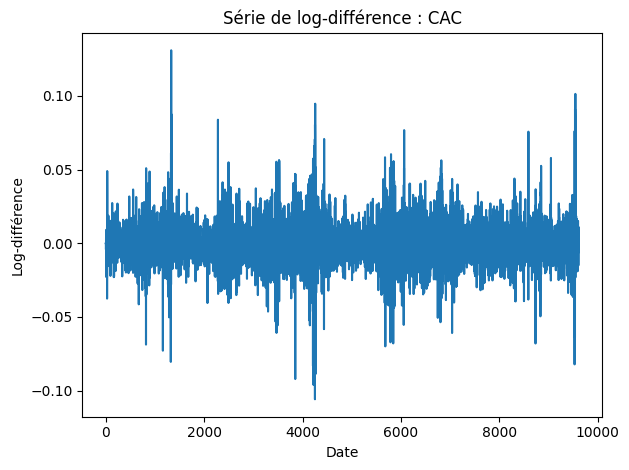

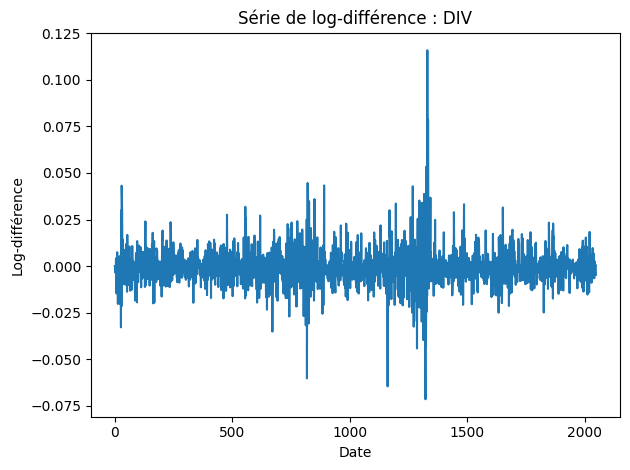

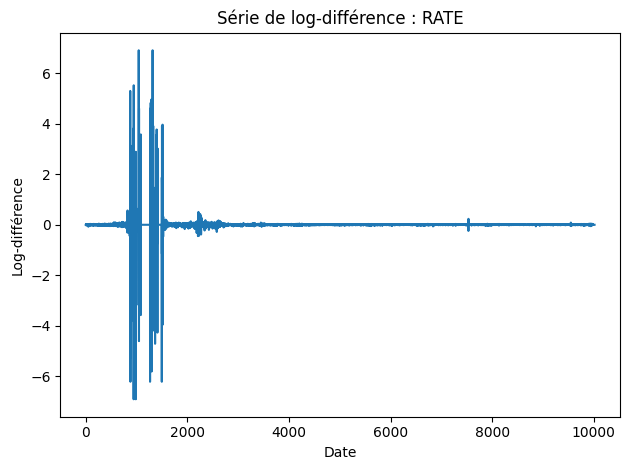

In [5]:
for name, df_ld in new_dfs.items():
    serie = df_ld[f"{name}_logdiff"].dropna()
    
    plt.figure()
    plt.plot(serie)  
    plt.title(f"Série de log-différence : {name}")
    plt.xlabel("Date")
    plt.ylabel("Log-différence")
    plt.tight_layout()
    plt.show()


In [6]:
# Extraire le DataFrame de la série CAC log-différenciée
df_cac_logdiff = new_dfs["CAC"]

print(df_cac_logdiff.head())

   CAC_logdiff
1     0.000000
2    -0.001740
3     0.000388
4    -0.004221
5    -0.002126


### B/ Log-differentiation et mise sous forme dataframe

In [7]:
CAC['Date'] = pd.to_datetime(CAC['Date'])
DIV['Date'] = pd.to_datetime(DIV['Date'])
RATE['Date'] = pd.to_datetime(RATE['Date'])

In [8]:
Data = pd.merge(CAC,RATE, on="Date")
Data = pd.merge(Data,DIV, on="Date")
Data

,Date,.FCHI (TRDPRC_1),FR10YT=RR (BID_YIELD),.C4SD (TRDPRC_1)
0,2025-05-20,7897.36,3.231,9003.9010
1,2025-05-19,7883.63,3.252,8990.1840
2,2025-05-16,7886.69,3.263,8962.5130
3,2025-05-15,7853.47,3.296,8929.7660
4,2025-05-14,7836.79,3.381,8914.0420
...,...,...,...,...
2042,2017-05-26,5336.64,0.760,5443.4669
2043,2017-05-25,5337.16,0.804,5443.2528
2044,2017-05-24,5341.34,0.843,5447.2730
2045,2017-05-23,5348.16,0.836,5446.8595


In [9]:
Data = pd.DataFrame(Data)
Data

,Date,.FCHI (TRDPRC_1),FR10YT=RR (BID_YIELD),.C4SD (TRDPRC_1)
0,2025-05-20,7897.36,3.231,9003.9010
1,2025-05-19,7883.63,3.252,8990.1840
2,2025-05-16,7886.69,3.263,8962.5130
3,2025-05-15,7853.47,3.296,8929.7660
4,2025-05-14,7836.79,3.381,8914.0420
...,...,...,...,...
2042,2017-05-26,5336.64,0.760,5443.4669
2043,2017-05-25,5337.16,0.804,5443.2528
2044,2017-05-24,5341.34,0.843,5447.2730
2045,2017-05-23,5348.16,0.836,5446.8595


In [10]:
Data = Data.rename(columns={".FCHI (TRDPRC_1)":"CAC","FR10YT=RR (BID_YIELD)":"RATE",".C4SD (TRDPRC_1)":"DIV"})
Data

,Date,CAC,RATE,DIV
0,2025-05-20,7897.36,3.231,9003.9010
1,2025-05-19,7883.63,3.252,8990.1840
2,2025-05-16,7886.69,3.263,8962.5130
3,2025-05-15,7853.47,3.296,8929.7660
4,2025-05-14,7836.79,3.381,8914.0420
...,...,...,...,...
2042,2017-05-26,5336.64,0.760,5443.4669
2043,2017-05-25,5337.16,0.804,5443.2528
2044,2017-05-24,5341.34,0.843,5447.2730
2045,2017-05-23,5348.16,0.836,5446.8595


In [11]:
print(Data.dtypes)

Date    datetime64[ns]
CAC            float64
RATE           float64
DIV            float64
dtype: object


In [12]:
Data['CAC'] = pd.to_numeric(Data['CAC'],errors = 'coerce')
Data['RATE'] = pd.to_numeric(Data['RATE'],errors = 'coerce')
Data['DIV'] = pd.to_numeric(Data['DIV'],errors = 'coerce')


In [13]:
Data['CAC'] = Data['CAC'].apply(log_secure).diff().fillna(0)
Data['RATE'] = Data['RATE'].apply(log_secure).diff().fillna(0)
Data['DIV'] = Data['DIV'].apply(log_secure).diff().fillna(0)

In [14]:
Data

,Date,CAC,RATE,DIV
0,2025-05-20,0.000000,0.000000,0.000000
1,2025-05-19,-0.001740,0.006479,-0.001525
2,2025-05-16,0.000388,0.003377,-0.003083
3,2025-05-15,-0.004221,0.010063,-0.003660
4,2025-05-14,-0.002126,0.025462,-0.001762
...,...,...,...,...
2042,2017-05-26,0.000782,0.028021,0.000194
2043,2017-05-25,0.000097,0.056281,-0.000039
2044,2017-05-24,0.000783,0.047368,0.000738
2045,2017-05-23,0.001276,-0.008338,-0.000076


<Axes: xlabel='Date'>

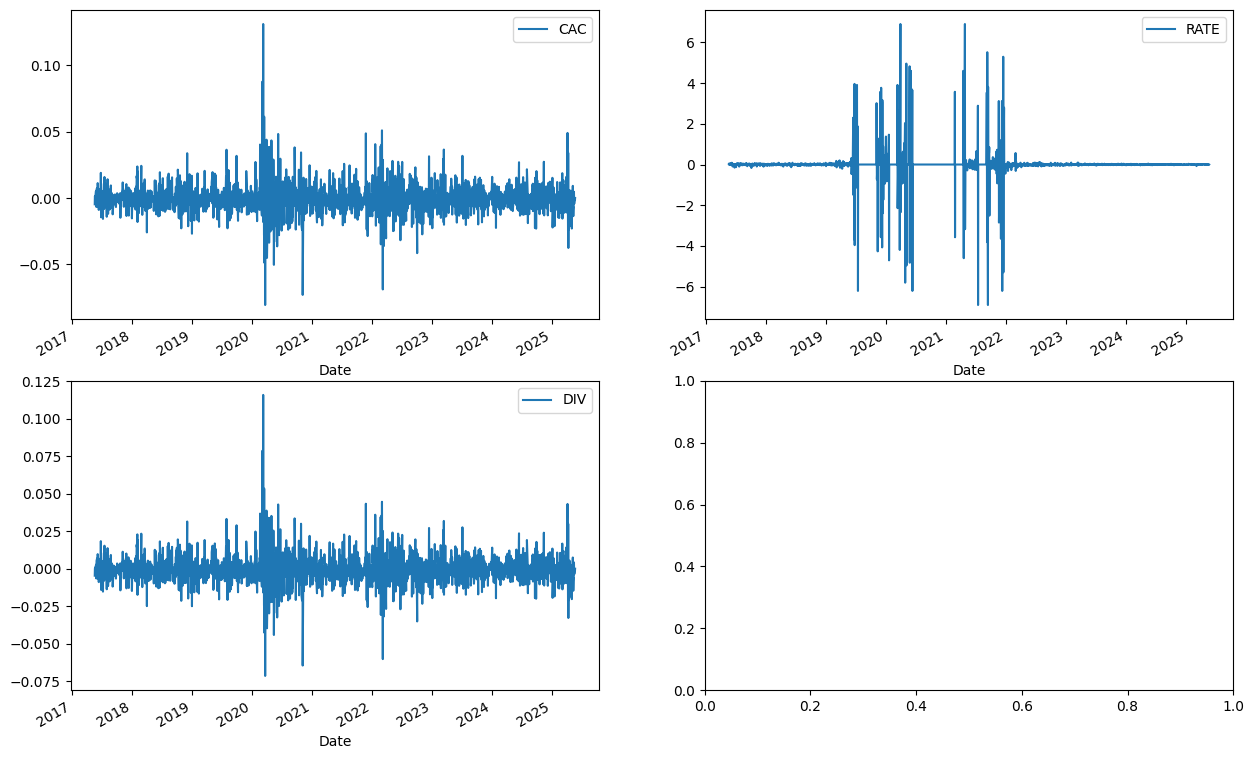

In [15]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
Data.plot(ax=ax[0,0],x='Date',y='CAC')
Data.plot(ax=ax[0,1],x='Date',y='RATE')
Data.plot(ax=ax[1,0],x='Date',y='DIV')

In [16]:
df=Data.copy()

In [17]:
len(df)

2047

In [18]:
df = df.dropna()

In [19]:
df

,Date,CAC,RATE,DIV
0,2025-05-20,0.000000,0.000000,0.000000
1,2025-05-19,-0.001740,0.006479,-0.001525
2,2025-05-16,0.000388,0.003377,-0.003083
3,2025-05-15,-0.004221,0.010063,-0.003660
4,2025-05-14,-0.002126,0.025462,-0.001762
...,...,...,...,...
2042,2017-05-26,0.000782,0.028021,0.000194
2043,2017-05-25,0.000097,0.056281,-0.000039
2044,2017-05-24,0.000783,0.047368,0.000738
2045,2017-05-23,0.001276,-0.008338,-0.000076


Insérer tests de stationnarité --> elles sont stationnaires en raaaapide according to ADF and KPSS tests

## II - Simulations et Minimisation

#### A/ Conditions initiales et espace de paramètres

In [20]:
from joblib import Parallel, delayed
import itertools

In [21]:
#Etats initiaux arbitraires - pas un problème si la simulation "oublie" vite ces valeurs
z0 = 1
k0 = 1 

In [22]:
#"grid search" pour les paramètres
rho_vals = np.linspace(-0.99,0.99,3) #AR(1) coefficient pour le choc techno zt -> valeur abs <1 pr stationnarité du processus 
gamma_vals = np.linspace(0.1,0.99,3)  #AR(1) coefficient pour l'évolution du capital log kt -> valeur abs <1 pr stationnarité du processus, inteprétation comme élasticité de production
beta_vals = np.linspace(0.2,0.99,3) #discount factor entre 0 et 1, supposons assez élevés par réalisme
zeta_vals = np.linspace(0.01,1,3) #intercept , petite valeur pour éviter les calculs interdits
sigma_vals = np.linspace(0.1,2,3) #volatilité du choc technologique zt

In [23]:
#grille cartésienne 
param_grid = list(itertools.product(rho_vals, gamma_vals, beta_vals, zeta_vals, sigma_vals))

In [24]:
#pour stocker les séries simulées
DIV_sim = np.zeros((6,2046))
CAC_sim = np.zeros((6,2046))
RATE_sim = np.zeros((6,2046))

In [25]:
# pour la simulation, on va enlever les 100 premiers paramètres pour atténuer l'influence des conditions initiales
burn_in = 100

In [26]:
# Autocorrélation au lag 1 pour une série x (moyenne sur les H simulations)
def autocorr(x):
    return np.corrcoef(x[:, :-1].ravel(), x[:, 1:].ravel())[0, 1]

#### B/ Mise en place des outils nécessaires

In [27]:
# pour la simulation, on va enlever les 100 premiers valeurs simulées pour atténuer l'influence des conditions initiales - c'est ça le burn_in
# H = 300 un peu arbitraire, pour atteindre un degré de précision raisonnable lorsqu'on parcourt une grille de plusieurs milliers de points
def simulate_and_moments(theta, T=2046, H=300, burn_in=100, seed=42):
    zeta, rho, sigma, beta, gamma = theta
    np.random.seed(seed)
    # matrices pour stocker les séries simulées
    ln_z = np.zeros((H,T+burn_in))
    k = np.zeros((H,T+burn_in))
    # conditions initiales
    ln_z[:, 0] = 0.0     # si tu veux démarrer ln z₀ à 0
    k[:, 0] = 1.0     # initialisation cruciale du capital
    epsilon = 1e-8 # garde_fou pour éviter les valeurs nulles
    #simuler H trajectoires en parallèle (vectorisé)
    for t in range(T+burn_in-1): #2046+100-1=2145
        eps = np.random.randn(H)*sigma #c'est pour un loi normale centrée réduite
        ln_z[:,t+1] = zeta + rho * ln_z[:,t] + eps
        z_t = np.exp(ln_z[:,t])
        k[:,t+1] = beta * gamma * z_t * (np.maximum(k[:,t], epsilon)**gamma) #équation de la dynamique du capital
        k[:,t+1] = np.maximum(k[:,t+1], epsilon)  
    # on enlève les burn_in
    ln_z = ln_z[:, burn_in:]
    k = np.maximum(k[:,burn_in:], epsilon)
    c = np.exp(ln_z)*(k**gamma) - k
    c = np.maximum(c, epsilon)
    r = gamma * np.exp(ln_z)*(k**(gamma-1)) #équation du rental rate
    d = c.copy() #pr michner, d_t = c_t
    # backward compute p_t via la Euler equation
    p = np.zeros_like((d))
    # On met p[:,-1] = 0 pour que la dernière valeur soit nulle puis on remonte
    for t in range(T-2, -1, -1):
        M = beta *(c[:,t]/c[:,t+1])
        M = np.where(np.isfinite(M), M, epsilon)
        p[:,t] = np.mean(M * (d[:,t+1] + p[:,t+1]), axis=0)
    # calculer les moments simulés (vecteurs de L moments)
    # exemple : moyenne et variance de r, d et p
    #R = (p[:,1:]+d[:,1:])/p[:,:-1] - 1
    m1 = r.mean()
    m2 = d.mean()
    m3 = p.mean()
    # Variances
    v1 = r.var()
    v2 = d.var()
    v3 = p.var()
    # Autocorrélations
    ac_r = autocorr(r)
    ac_d = autocorr(d)
    ac_p = autocorr(p)
    #d3 = (d/p).mean()
    moments = np.array([m1,m2,m3, v1, v2, v3, ac_r, ac_d, ac_p])
    if not np.all(np.isfinite(moments)):
        return np.ones(9) * 1e20
    return moments



In [28]:
rate = df['RATE'].values
div = df['DIV'].values
cac = df['CAC'].values
ac_rate = pd.Series(rate).autocorr(lag=1)
ac_div = pd.Series(div).autocorr(lag=1)
ac_cac = pd.Series(cac).autocorr(lag=1)

In [29]:
s_obs = np.array([
    df['RATE'].mean(), df['DIV'].mean(), df['CAC'].mean(),
    df['RATE'].var(),  df['DIV'].var(),  df['CAC'].var(),
    ac_rate, ac_div, ac_cac
])
s_obs

array([-6.55786259e-04, -2.47816575e-04, -1.92727902e-04,  5.35007528e-01,
        1.05729826e-04,  1.33937949e-04, -3.69228614e-01, -1.09390714e-02,
       -1.22418423e-02])

In [30]:
len(s_obs)


9

In [31]:
def distance(theta,W=None):
    # Simuler les moments
    s_sim = simulate_and_moments(theta)
    if not np.all(np.isfinite(s_sim)):
        return 1e30  # pénalité énorme
    diff = s_sim - s_obs
    if W is None: 
        # par défaut, on utilise l'identité
        W = np.eye(len(s_obs))
    # Calculer la distance entre les moments simulés et observés
    dist = diff.T @ W @ diff
    return dist

#### C/ Mise en oeuvre

In [32]:
# pour la première passe on utilise la matrice identité
W_identity = np.eye(len(s_obs))
results = Parallel(n_jobs = -1,verbose=10)(delayed(lambda th: (th, distance(th,W_identity)))(th)
                                           for th in param_grid)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 229 out of 243 | elapsed:  

##### C.1. Résultats Première Etape

In [33]:
theta_best, dist_best = min(results, key=lambda x: x[1])
print("meilleur theta:", theta_best, "distance", dist_best)

meilleur theta: (np.float64(-0.99), np.float64(0.1), np.float64(0.99), np.float64(0.01), np.float64(1.05)) distance 0.44179828135276294


In [34]:
# Simuler plusieurs fois pour estimer la variance-covariance des moments
H = 300
moments = np.array([simulate_and_moments(theta_best, H=1) for _ in range(H)])
S = np.cov(moments, rowvar=False)
S += np.eye(S.shape[0]) * 1e-3 # ajout d'une petite valeur pour la rendre définie positive 
W_opt = np.linalg.pinv(S)  # Inverse généralisée pour éviter les problèmes numériques

In [35]:
def distance_step2(theta):
    return distance(theta, W_opt)

##### C.2. Résultats Deuxième Etape

In [36]:
from scipy.optimize import minimize

bounds = [
    (-0.95, 0.95),   # rho
    (0.1, 0.99),     # gamma
    (0.01, 0.99),    # beta
    (0.01, 2),       # zeta
    (0.01, 2)        # sigma
]

res = minimize(distance_step2, theta_best, method='L-BFGS-B', bounds = bounds, options={'maxiter': 2000, 'disp': True})
theta_affine = res.x  # <-- Stocke le theta affiné
print("Meilleur theta affiné (step 2):", res.x)
print("Distance finale (step 2):", res.fun)

Meilleur theta affiné (step 2): [-0.90738129  0.1         0.99        0.01        1.02666984]
Distance finale (step 2): 416.4600010798234


In [37]:
s_obs

array([-6.55786259e-04, -2.47816575e-04, -1.92727902e-04,  5.35007528e-01,
        1.05729826e-04,  1.33937949e-04, -3.69228614e-01, -1.09390714e-02,
       -1.22418423e-02])

In [38]:
s_sim = simulate_and_moments(res.x)
print("Moments simulés :", s_sim)
print("Moments observés:", s_obs)
print("Erreur sur moments :", s_sim - s_obs)

Moments simulés : [3.75620023e-01 1.01373329e-08 1.02354007e-10 2.35782318e-01
 3.61834953e-18 6.34824513e-24 5.99776004e-02 4.16131231e-03
 1.76691305e-02]
Moments observés: [-6.55786259e-04 -2.47816575e-04 -1.92727902e-04  5.35007528e-01
  1.05729826e-04  1.33937949e-04 -3.69228614e-01 -1.09390714e-02
 -1.22418423e-02]
Erreur sur moments : [ 3.76275809e-01  2.47826712e-04  1.92728005e-04 -2.99225210e-01
 -1.05729826e-04 -1.33937949e-04  4.29206215e-01  1.51003837e-02
  2.99109727e-02]


##### C.3. Debug check

In [39]:
eigvals = np.linalg.eigvals(W_opt)
print("Valeurs propres de W_opt", eigvals)

Valeurs propres de W_opt [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]


In [40]:
print("Variances des moments simulés :", np.diag(S))

Variances des moments simulés : [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001]


## III - Visualisation des séries simulées

#### A/ Visualisation des séries simulées avec la combinaison de paramètres de la première étape

In [41]:
def simulate_trajectories(theta, T=2046, H=300, burn_in=100, seed=42):
    zeta, rho, sigma, beta, gamma = theta
    np.random.seed(seed)
    ln_z = np.zeros((H,T+burn_in))
    k = np.zeros((H,T+burn_in))
    ln_z[:, 0] = 0.0
    k[:, 0] = 1.0
    epsilon = 1e-8
    for t in range(T+burn_in-1):
        eps = np.random.randn(H)*sigma
        ln_z[:,t+1] = zeta + rho * ln_z[:,t] + eps
        z_t = np.exp(ln_z[:,t])
        k[:,t+1] = beta * gamma * z_t * (np.maximum(k[:,t], epsilon)**gamma)
        k[:,t+1] = np.maximum(k[:,t+1], epsilon)
    ln_z = ln_z[:, burn_in:]
    k = np.maximum(k[:,burn_in:], epsilon)
    c = np.exp(ln_z)*(k**gamma) - k
    c = np.maximum(c, epsilon)
    r = gamma * np.exp(ln_z)*(k**(gamma-1))
    d = c.copy()
    # backward compute p_t via la Euler equation
    p = np.zeros_like(d)
    for t in range(T-2, -1, -1):
        M = beta *(c[:,t]/c[:,t+1])
        M = np.where(np.isfinite(M), M, epsilon)
        p[:,t] = np.mean(M * (d[:,t+1] + p[:,t+1]), axis=0)
    return r, d, p

# Ensuite, pour stocker les trajectoires simulées :
theta_plot = res.x  # ou theta_best
r, d, p = simulate_trajectories(theta_plot)

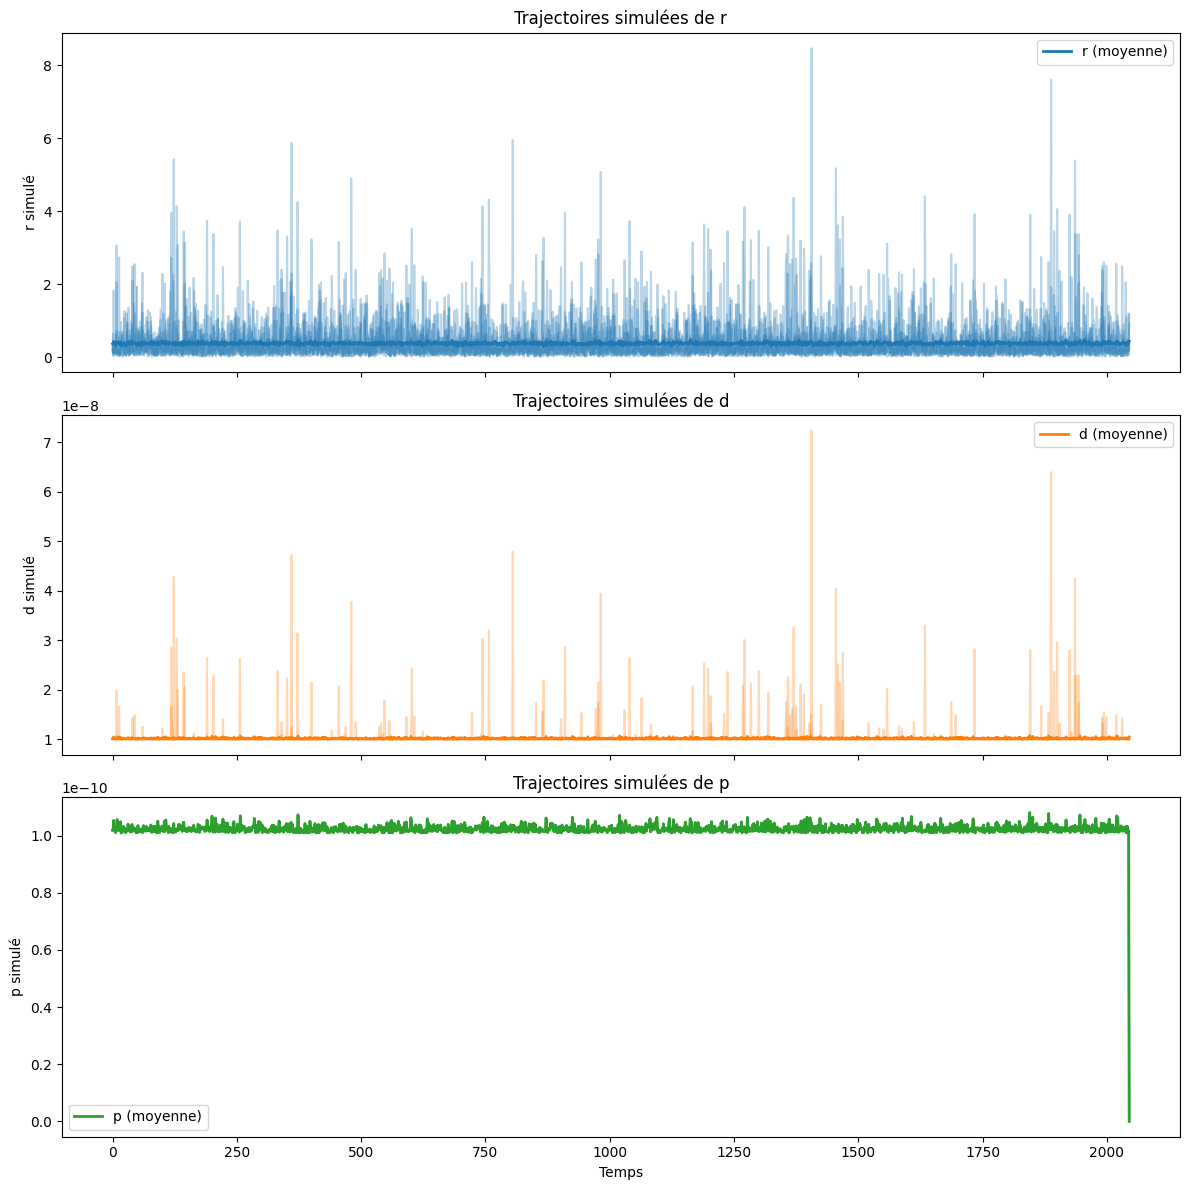

In [42]:
import matplotlib.pyplot as plt

T = r.shape[1]
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# r
for i in range(5):
    axes[0].plot(r[i], color='tab:blue', alpha=0.3)
axes[0].plot(r.mean(axis=0), color='tab:blue', label='r (moyenne)', linewidth=2)
axes[0].set_ylabel('r simulé')
axes[0].set_title('Trajectoires simulées de r')
axes[0].legend()

# d
for i in range(5):
    axes[1].plot(d[i], color='tab:orange', alpha=0.3)
axes[1].plot(d.mean(axis=0), color='tab:orange', label='d (moyenne)', linewidth=2)
axes[1].set_ylabel('d simulé')
axes[1].set_title('Trajectoires simulées de d')
axes[1].legend()

# p
for i in range(5):
    axes[2].plot(p[i], color='tab:green', alpha=0.3)
axes[2].plot(p.mean(axis=0), color='tab:green', label='p (moyenne)', linewidth=2)
axes[2].set_xlabel('Temps')
axes[2].set_ylabel('p simulé')
axes[2].set_title('Trajectoires simulées de p')
axes[2].legend()

plt.tight_layout()
plt.show()

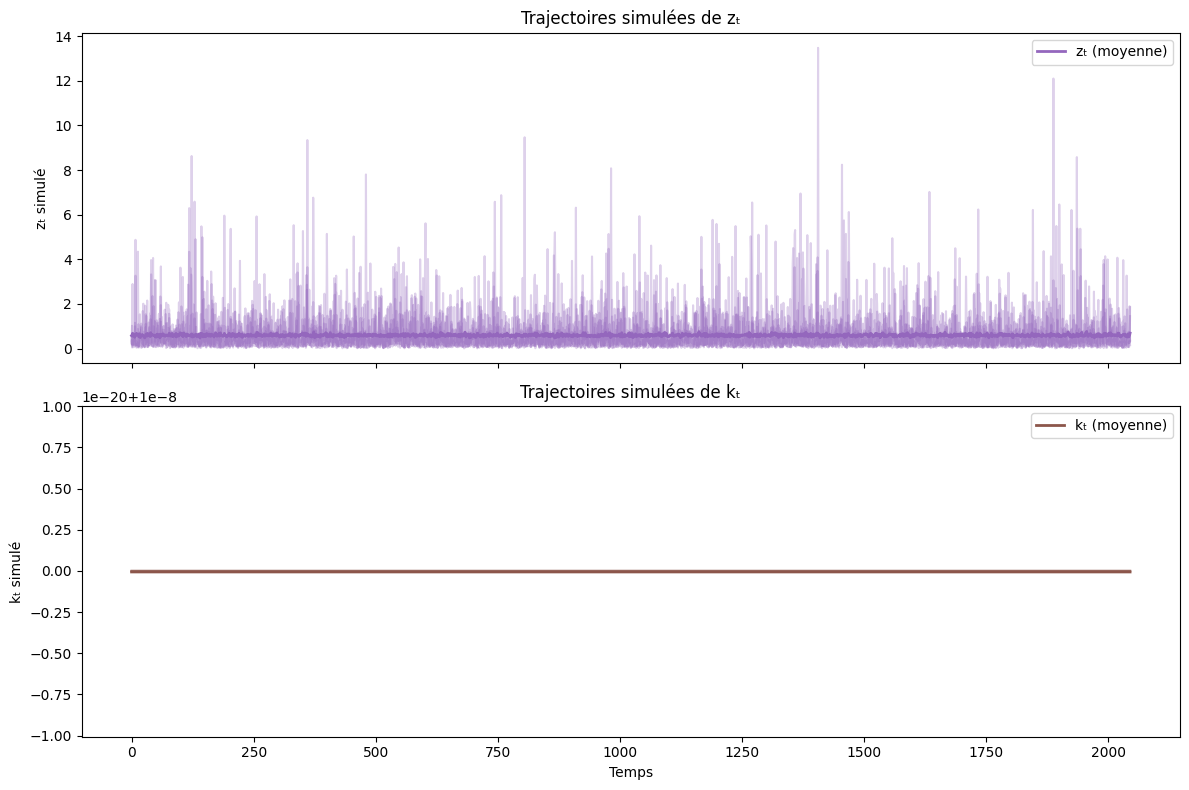

In [43]:
def simulate_trajectories(theta, T=2046, H=300, burn_in=100, seed=42):
    zeta, rho, sigma, beta, gamma = theta
    np.random.seed(seed)
    ln_z = np.zeros((H,T+burn_in))
    k = np.zeros((H,T+burn_in))
    ln_z[:, 0] = 0.0
    k[:, 0] = 1.0
    epsilon = 1e-8
    for t in range(T+burn_in-1):
        eps = np.random.randn(H)*sigma
        ln_z[:,t+1] = zeta + rho * ln_z[:,t] + eps
        z_t = np.exp(ln_z[:,t])
        k[:,t+1] = beta * gamma * z_t * (np.maximum(k[:,t], epsilon)**gamma)
        k[:,t+1] = np.maximum(k[:,t+1], epsilon)
    ln_z = ln_z[:, burn_in:]
    k = np.maximum(k[:,burn_in:], epsilon)
    c = np.exp(ln_z)*(k**gamma) - k
    c = np.maximum(c, epsilon)
    r = gamma * np.exp(ln_z)*(k**(gamma-1))
    d = c.copy()
    # backward compute p_t via la Euler equation
    p = np.zeros_like(d)
    for t in range(T-2, -1, -1):
        M = beta *(c[:,t]/c[:,t+1])
        M = np.where(np.isfinite(M), M, epsilon)
        p[:,t] = np.mean(M * (d[:,t+1] + p[:,t+1]), axis=0)
    z = np.exp(ln_z)
    return r, d, p, z, k

# Simule les trajectoires
theta_plot = res.x  # ou theta_best
r, d, p, z, k = simulate_trajectories(theta_plot)

# Plot séparés pour zt et kt
import matplotlib.pyplot as plt

T = r.shape[1]
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# zt
for i in range(5):
    axes[0].plot(z[i], color='tab:purple', alpha=0.3)
axes[0].plot(z.mean(axis=0), color='tab:purple', label='zₜ (moyenne)', linewidth=2)
axes[0].set_ylabel('zₜ simulé')
axes[0].set_title('Trajectoires simulées de zₜ')
axes[0].legend()

# kt
for i in range(5):
    axes[1].plot(k[i], color='tab:brown', alpha=0.3)
axes[1].plot(k.mean(axis=0), color='tab:brown', label='kₜ (moyenne)', linewidth=2)
axes[1].set_ylabel('kₜ simulé')
axes[1].set_title('Trajectoires simulées de kₜ')
axes[1].set_xlabel('Temps')
axes[1].legend()

plt.tight_layout()
plt.show()

#### B/ Visualisation des séries simulées avec la combinaison de paramètres de la deuxième étape

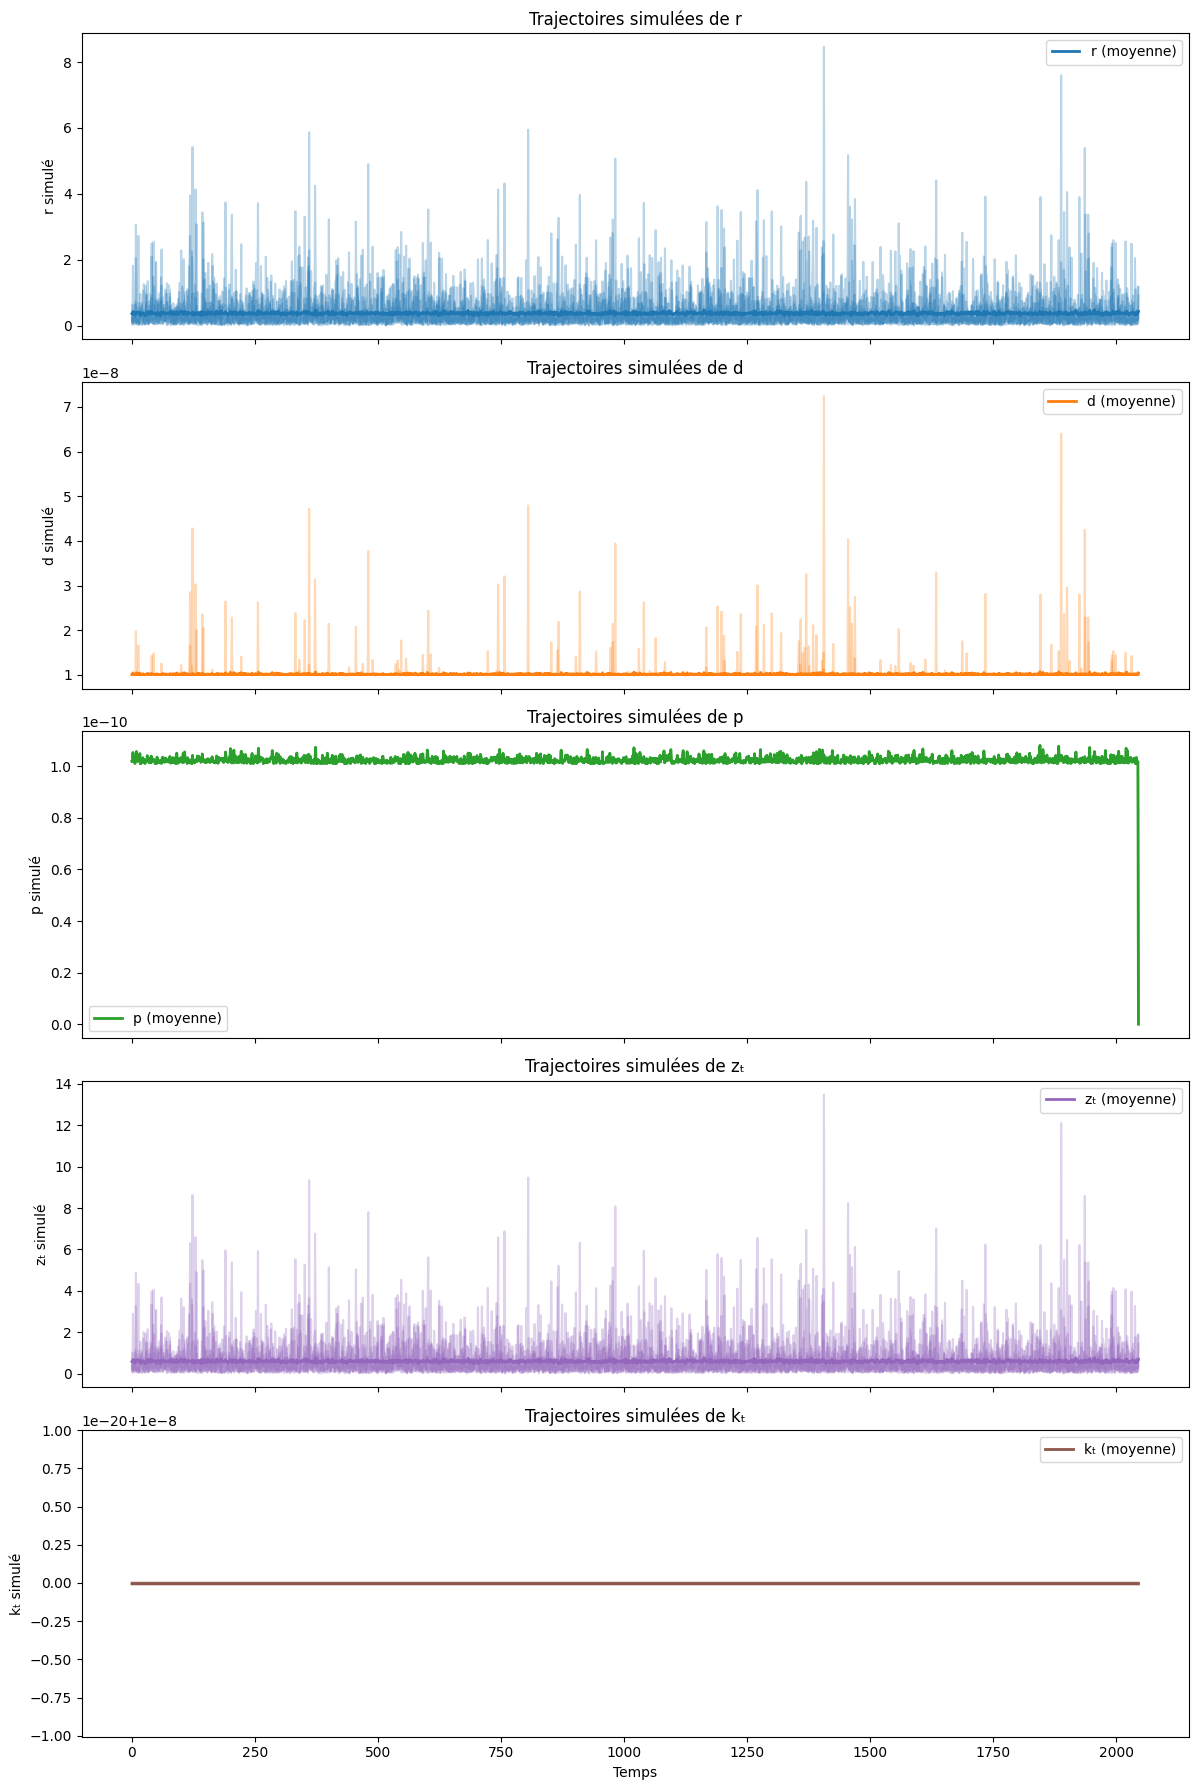

In [44]:
# Pour replot toutes les séries simulées avec ce set de paramètres :
r, d, p, z, k = simulate_trajectories(theta_affine)

import matplotlib.pyplot as plt

T = r.shape[1]
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

# r
for i in range(5):
    axes[0].plot(r[i], color='tab:blue', alpha=0.3)
axes[0].plot(r.mean(axis=0), color='tab:blue', label='r (moyenne)', linewidth=2)
axes[0].set_ylabel('r simulé')
axes[0].set_title('Trajectoires simulées de r')
axes[0].legend()

# d
for i in range(5):
    axes[1].plot(d[i], color='tab:orange', alpha=0.3)
axes[1].plot(d.mean(axis=0), color='tab:orange', label='d (moyenne)', linewidth=2)
axes[1].set_ylabel('d simulé')
axes[1].set_title('Trajectoires simulées de d')
axes[1].legend()

# p
for i in range(5):
    axes[2].plot(p[i], color='tab:green', alpha=0.3)
axes[2].plot(p.mean(axis=0), color='tab:green', label='p (moyenne)', linewidth=2)
axes[2].set_ylabel('p simulé')
axes[2].set_title('Trajectoires simulées de p')
axes[2].legend()

# zt
for i in range(5):
    axes[3].plot(z[i], color='tab:purple', alpha=0.3)
axes[3].plot(z.mean(axis=0), color='tab:purple', label='zₜ (moyenne)', linewidth=2)
axes[3].set_ylabel('zₜ simulé')
axes[3].set_title('Trajectoires simulées de zₜ')
axes[3].legend()

# kt
for i in range(5):
    axes[4].plot(k[i], color='tab:brown', alpha=0.3)
axes[4].plot(k.mean(axis=0), color='tab:brown', label='kₜ (moyenne)', linewidth=2)
axes[4].set_ylabel('kₜ simulé')
axes[4].set_title('Trajectoires simulées de kₜ')
axes[4].set_xlabel('Temps')
axes[4].legend()

plt.tight_layout()
plt.show()